In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..\..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [8]:
from log_analysis import *

In [9]:
samples = ['HSRR062625', 'HSRR062634', 'HSRR062645', 'HSRR062650']

HSRR062625
Bwa
C:\Users\juanm\Documents\Master\Data Science\3_Semester\CINECA\CINECA_repo
Fastqc
SamSort
BaseRecalibrator
ApplyBQSR
HaploType


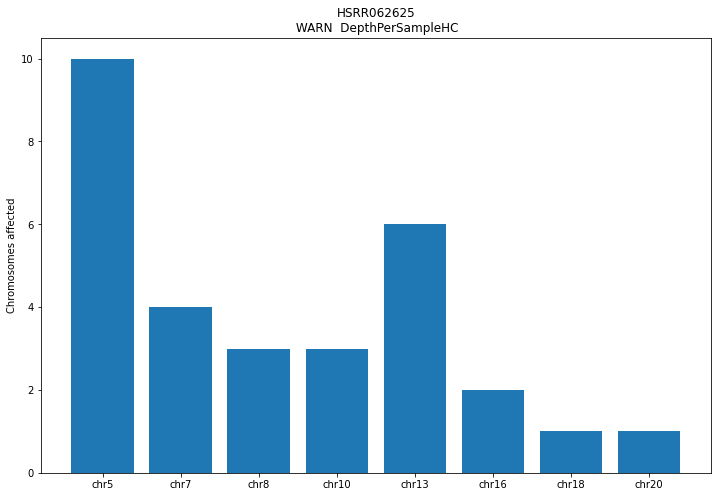

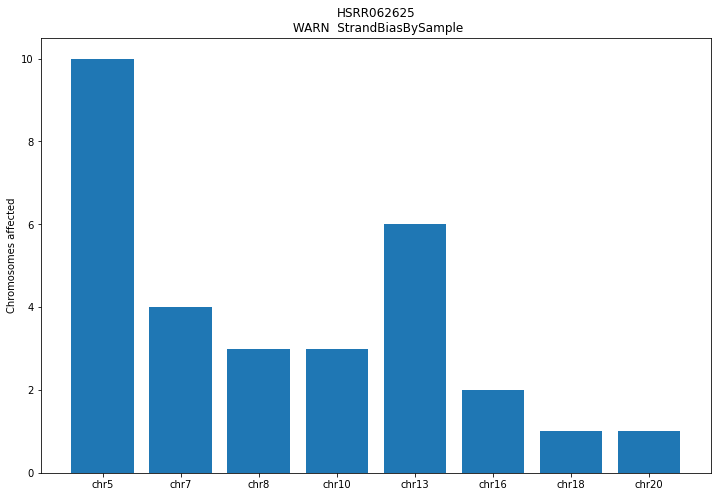

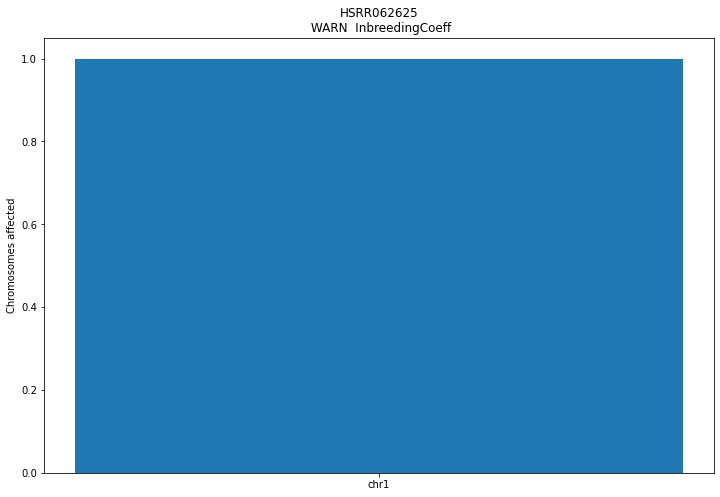

Everything fine so far :)

HSRR062634
Bwa
C:\Users\juanm\Documents\Master\Data Science\3_Semester\CINECA\CINECA_repo
Fastqc
SamSort
BaseRecalibrator
ApplyBQSR
HaploType


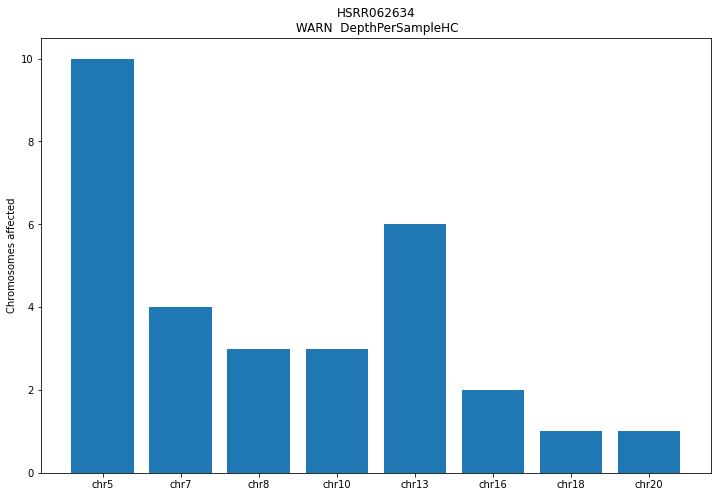

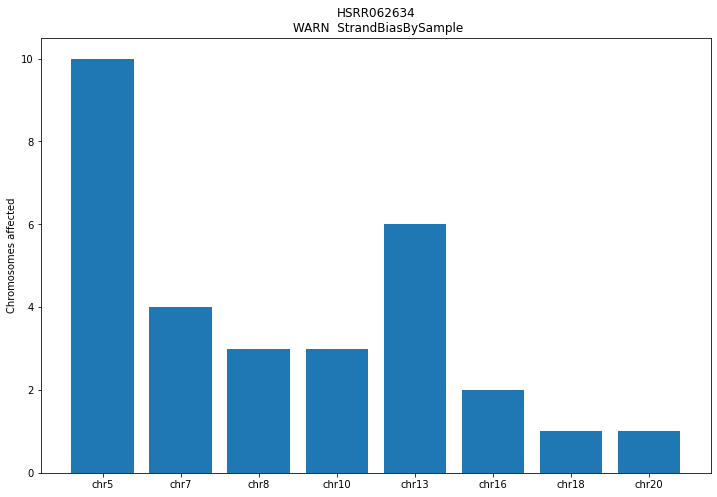

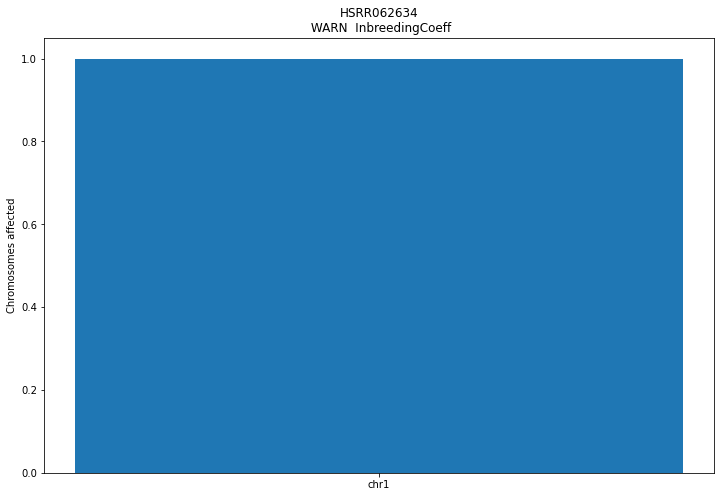

Everything fine so far :)

HSRR062645
Bwa
C:\Users\juanm\Documents\Master\Data Science\3_Semester\CINECA\CINECA_repo
Fastqc
SamSort
BaseRecalibrator
ApplyBQSR
HaploType


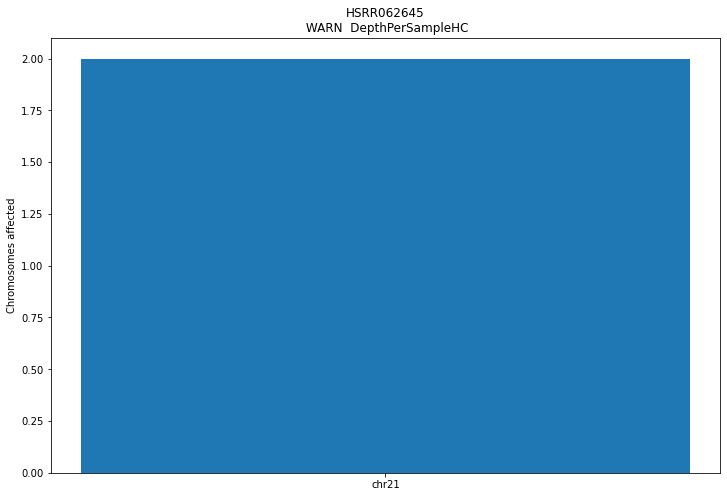

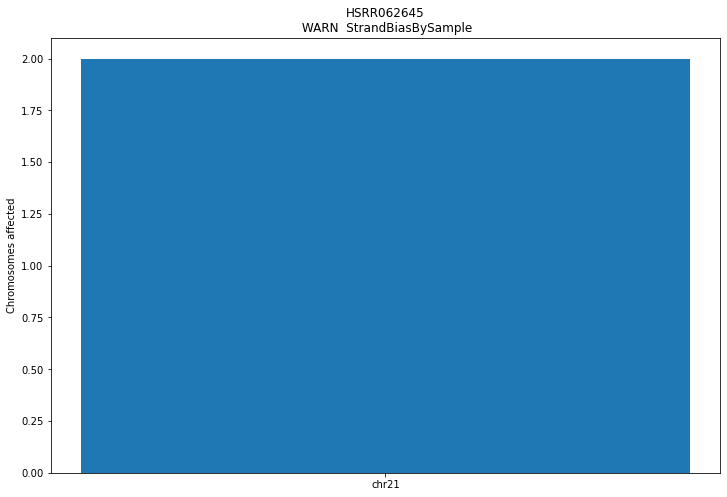

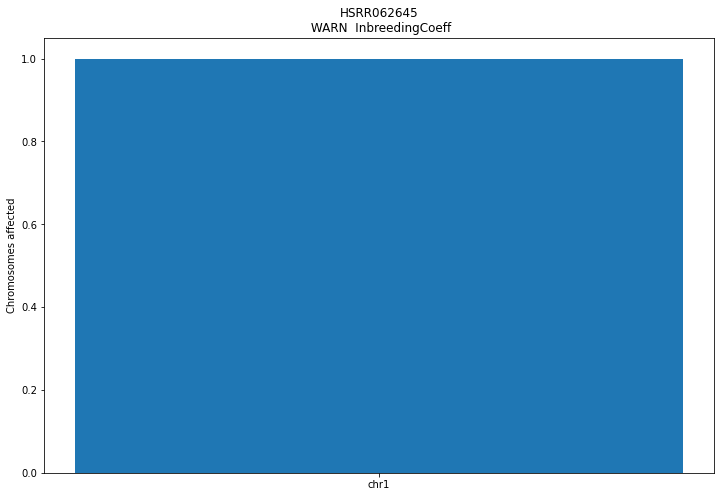

Everything fine so far :)

HSRR062650
Bwa
C:\Users\juanm\Documents\Master\Data Science\3_Semester\CINECA\CINECA_repo
Fastqc
SamSort
BaseRecalibrator
ApplyBQSR
HaploType


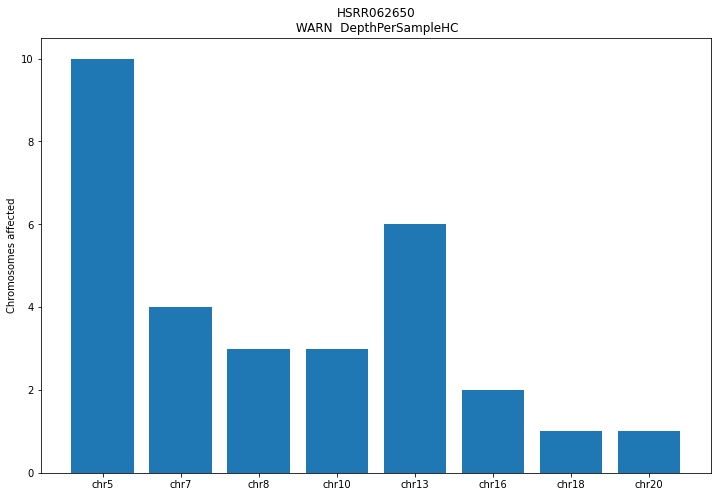

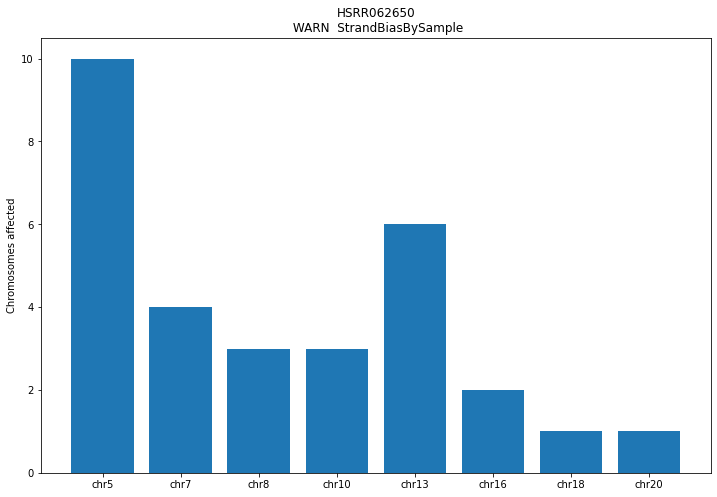

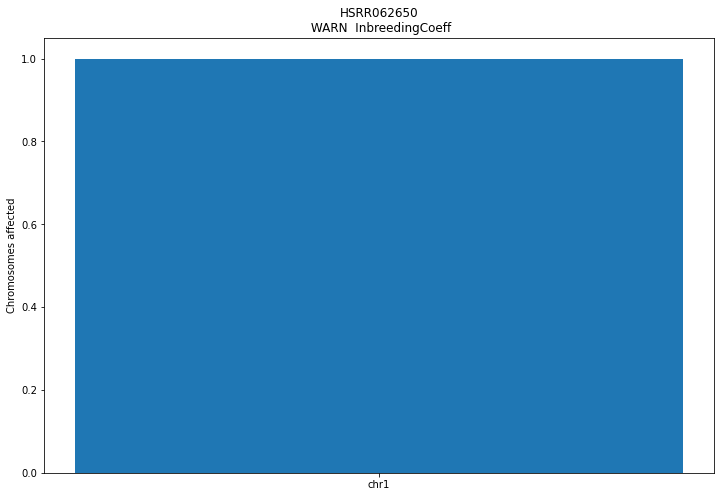

Everything fine so far :)



In [66]:
for sample in samples:
    print(sample)
    print('Bwa')
    bwa_class = Bwa(path='data/bwa/', sample=sample)
    bwa_class.check_log()
    
    print('Fastqc')
    fastqc_class = Fastqc(path='data/fastqc/', sample=sample)
    fastqc_class.check_log()
    
    print('SamSort')
    samsort_class = SamSort(path='data/samsort/', sample=sample)
    samsort_class.check_log()
    
    print('BaseRecalibrator')
    baserecalibrator_class = BaseRecalibrator(path='data/baserecalibrator/', sample=sample)
    baserecalibrator_class.check_log()
    
    print('ApplyBQSR')
    applybqsr_class = ApplyBQSR(path='data/applybqsr/', sample=sample)
    applybqsr_class.check_log()
    
    print('HaploType')
    haplo_class = HaploType(path='data/haplotypecaller/', sample=sample)
    haplo_class.check_log()
    print('Everything fine so far :)')
    print('===============')
    print('')

In [ ]:
plt.figure(fig)